**Секція 1. Логістична регресія з нуля.**

Будемо крок за кроком будувати модель лог регресії з нуля для передбачення, чи буде врожай більше за 80 яблук (задача подібна до лекційної, але на класифікацію).

Давайте нагадаємо основні формули для логістичної регресії.

### Функція гіпотези - обчислення передбачення у логістичній регресії:

$$
\hat{y} = \sigma(x W^T + b) = \frac{1}{1 + e^{-(x W^T + b)}}
$$

Де:
- $ \hat{y} $ — це ймовірність "позитивного" класу.
- $ x $ — це вектор (або матриця для набору прикладів) вхідних даних.
- $ W $ — це вектор (або матриця) вагових коефіцієнтів моделі.
- $ b $ — це зміщення (bias).
- $ \sigma(z) $ — це сигмоїдна функція активації.

### Як обчислюється сигмоїдна функція:

Сигмоїдна функція $ \sigma(z) $ має вигляд:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

Ця функція перетворює будь-яке дійсне значення $ z $ в інтервал від 0 до 1, що дозволяє інтерпретувати вихід як ймовірність для логістичної регресії.

### Формула функції втрат для логістичної регресії (бінарна крос-ентропія):

Функція втрат крос-ентропії оцінює, наскільки добре модель передбачає класи, порівнюючи передбачені ймовірності $ \hat{y} $ із справжніми мітками $ y $. Формула наступна:

$$
L(y, \hat{y}) = - \left[ y \cdot \log(\hat{y}) + (1 - y) \cdot \log(1 - \hat{y}) \right]
$$

Де:
- $ y $ — це справжнє значення (мітка класу, 0 або 1).
- $ \hat{y} $ — це передбачене значення (ймовірність).



1.
Тут вже наведений код для ініціювання набору даних в форматі numpy. Перетворіть `inputs`, `targets` на `torch` тензори. Виведіть результат на екран.

In [1]:
import torch
import numpy as np
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim
import torch.nn.functional as F

In [2]:
# Вхідні дані (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70]], dtype='float32')

# Таргети (apples > 80)
targets = np.array([[0],
                    [1],
                    [1],
                    [0],
                    [1]], dtype='float32')

In [3]:
# Перетворення на PyTorch тензори
inputs_tensor = torch.from_numpy(inputs)
targets_tensor = torch.from_numpy(targets)

# Виведення результату
print("Вхідні дані як тензор:")
print(inputs_tensor)

print("Таргети як тензор:")
print(targets_tensor)

Вхідні дані як тензор:
tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
Таргети як тензор:
tensor([[0.],
        [1.],
        [1.],
        [0.],
        [1.]])


2. Ініціюйте ваги `w`, `b` для моделі логістичної регресії потрібної форми зважаючи на розмірності даних випадковими значеннями з нормального розподілу. Лишаю тут код для фіксації `random_seed`.

In [4]:
torch.random.manual_seed(1)

In [5]:
# Розмірність вхідних даних
input_size = inputs.shape[1]  # Кількість ознак

# Ініціалізація ваг і зсуву з нормального розподілу
w = torch.randn(input_size, 1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

print("Ваги w:")
print(w)

print("Зсув b:")
print(b)

Ваги w:
tensor([[0.6614],
        [0.2669],
        [0.0617]], requires_grad=True)
Зсув b:
tensor([0.6213], requires_grad=True)


3. Напишіть функцію `model`, яка буде обчислювати функцію гіпотези в логістичній регресії і дозволяти робити передбачення на основі введеного рядка даних і коефіцієнтів в змінних `w`, `b`.

  **Важливий момент**, що функція `model` робить обчислення на `torch.tensors`, тож для математичних обчислень використовуємо фукнціонал `torch`, наприклад:
  - обчсилення $e^x$: `torch.exp(x)`
  - обчсилення $log(x)$: `torch.log(x)`
  - обчислення середнього значення вектору `x`: `torch.mean(x)`

  Використайте функцію `model` для обчислення передбачень з поточними значеннями `w`, `b`.Виведіть результат обчислень на екран.

  Проаналізуйте передбачення. Чи не викликають вони у вас підозр? І якщо викликають, то чим це може бути зумовлено?

In [6]:
def model(x, w, b):
    """
    Функція для обчислення виходу логістичної регресії.

    Args:
        x: Вхідний тензор даних.
        w: Вектор ваг.
        b: Зсув.

    Returns:
        Тензор, що містить ймовірності належності до позитивного класу.
    """

    # Обчислення лінійної комбінації
    linear = torch.matmul(x, w) + b

    # Застосування сигмоїди для отримання ймовірності
    y_predicted = torch.sigmoid(linear)

    return y_predicted

In [7]:
# Обчислення передбачення
predictions = model(inputs_tensor, w, b)
print("Передбачення:")
print(predictions)

print("Таргети як тензор:")
print(targets_tensor)

Передбачення:
tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]], grad_fn=<SigmoidBackward0>)
Таргети як тензор:
tensor([[0.],
        [1.],
        [1.],
        [0.],
        [1.]])


**Спостереження:**
    Всі передбачення в нас ідентифікувалися як позитивний клас - "1", хоча в оригінальних таргетах бачимо і негативні класи

Це може бути пов"язано з вагами, або неправильна функція втрат.

4. Напишіть функцію `binary_cross_entropy`, яка приймає на вхід передбачення моделі `predicted_probs` та справжні мітки в даних `true_labels` і обчислює значення втрат (loss)  за формулою бінарної крос-ентропії для кожного екземпляра та вертає середні втрати по всьому набору даних.
  Використайте функцію `binary_cross_entropy` для обчислення втрат для поточних передбачень моделі.

In [8]:
def binary_cross_entropy(predicted_probs, true_labels):
  """
  Обчислює бінарну крос-ентропію для кожного зразка та повертає середнє значення.

  Args:
    predicted_probs: Тензор ймовірностей, передбачених моделлю.
    true_labels: Тензор справжніх міток (0 або 1).

  Returns:
    Середнє значення бінарної крос-ентропії.
  """

  # Запобігаємо логарифмуванню нуля
  epsilon = 1e-8
  predicted_probs = torch.clamp(predicted_probs, epsilon, 1 - epsilon)

  # Обчислення бінарної крос-ентропії для кожного зразка
  bce = -1 * (true_labels * torch.log(predicted_probs) + (1 - true_labels) * torch.log(1 - predicted_probs))

  # Обчислення середнього значення втрат
  loss = torch.mean(bce)
  return loss

In [9]:
loss = binary_cross_entropy(predictions, targets_tensor)
print("Середні втрати:", loss)

Середні втрати: tensor(nan, grad_fn=<MeanBackward0>)


In [10]:
if torch.isnan(loss).any():
    print("Знайдено NaN у тензорі втрат")

Знайдено NaN у тензорі втрат


5. Зробіть зворотнє поширення помилки і виведіть градієнти за параметрами `w`, `b`. Проаналізуйте їх значення. Як гадаєте, чому вони саме такі?

In [11]:
# Обчислення градієнтів
loss.backward()

# Виведення градієнтів
print("Градієнт для w:", w.grad)
print("Градієнт для b:", b.grad)

Градієнт для w: tensor([[nan],
        [nan],
        [nan]])
Градієнт для b: tensor([nan])


**Що сталось?**

В цій задачі, коли ми ініціювали значення випадковими значеннями з нормального розподілу, насправді ці значення не були дуже гарними стартовими значеннями і привели до того, що градієнти стали дуже малими або навіть рівними нулю (це призводить до того, що градієнти "зникають"), і відповідно при оновленні ваг у нас не буде нічого змінюватись. Це називається `gradient vanishing`. Це відбувається через **насичення сигмоїдної функції активації.**

У нашій задачі ми використовуємо сигмоїдну функцію активації, яка має такий вигляд:

   $$
   \sigma(z) = \frac{1}{1 + e^{-z}}
   $$


Коли значення $z$ дуже велике або дуже мале, сигмоїдна функція починає "насичуватись". Це означає, що для великих позитивних $z$ сигмоїда наближається до 1, а для великих негативних — до 0. В цих діапазонах градієнти починають стрімко зменшуватись і наближаються до нуля (бо градієнт - це похідна, похідна на проміжку функції, де вона паралельна осі ОХ, дорівнює 0), що робить оновлення ваг неможливим.

![](https://editor.analyticsvidhya.com/uploads/27889vaegp.png)

У логістичній регресії $ z = x \cdot w + b $. Якщо ваги $w, b$ - великі, значення $z$ також буде великим, і сигмоїда перейде в насичену область, де градієнти дуже малі.

Саме це сталося в нашій задачі, де великі випадкові значення ваг викликали насичення сигмоїдної функції. Це в свою чергу призводить до того, що під час зворотного поширення помилки (backpropagation) модель оновлює ваги дуже повільно або зовсім не оновлює. Це називається проблемою **зникнення градієнтів** (gradient vanishing problem).

**Що ж робити?**
Ініціювати ваги маленькими значеннями навколо нуля. Наприклад ми можемо просто в існуючій ініціалізації ваги розділити на 1000. Можна також використати інший спосіб ініціалізації вагів - інформація про це [тут](https://www.geeksforgeeks.org/initialize-weights-in-pytorch/).

Як це робити - показую нижче. **Виконайте код та знову обчисліть передбачення, лосс і виведіть градієнти.**

А я пишу пояснення, чому просто не зробити

```
w = torch.randn(1, 3, requires_grad=True)/1000
b = torch.randn(1, requires_grad=True)/1000
```

Нам потрібно, аби тензори вагів були листовими (leaf tensors).

1. **Що таке листовий тензор**
Листовий тензор — це тензор, який був створений користувачем безпосередньо і з якого починається обчислювальний граф. Якщо такий тензор має `requires_grad=True`, PyTorch буде відслідковувати всі операції, виконані над ним, щоб правильно обчислювати градієнти під час навчання.

2. **Чому ми використовуємо `w.data` замість звичайних операцій**
Якщо ми просто виконали б операції, такі як `(w - 0.5) / 100`, ми б отримали **новий тензор**, який вже не був би листовим тензором, оскільки ці операції створюють **новий** тензор, а не модифікують існуючий.

  Проте, щоб залишити наші тензори ваги `w` та зміщення `b` листовими і продовжити можливість відстеження градієнтів під час тренування, ми використовуємо атрибут `.data`. Цей атрибут дозволяє **виконувати операції in-place (прямо на існуючому тензорі)** без зміни самого об'єкта тензора. Отже, тензор залишається листовим, і PyTorch може коректно обчислювати його градієнти.

3. **Чому важливо залишити тензор листовим**
Якщо тензор більше не є листовим (наприклад, через проведення операцій, що створюють нові тензори), ви не зможете отримати градієнти за допомогою `w.grad` чи `b.grad` після виклику `loss.backward()`. Це може призвести до втрати можливості оновлення параметрів під час тренування моделі. В нашому випадку ми хочемо, щоб тензори `w` та `b` накопичували градієнти, тому вони повинні залишатись листовими.

**Висновок:**
Ми використовуємо `.data`, щоб виконати операції зміни значень на ваги і зміщення **in-place**, залишаючи їх листовими тензорами, які можуть накопичувати градієнти під час навчання. Це дозволяє коректно працювати механізму зворотного поширення помилки (backpropagation) і оновлювати ваги моделі.

5. Виконайте код та знову обчисліть передбачення, лосс і знайдіть градієнти та виведіть всі ці тензори на екран.

In [12]:
torch.random.manual_seed(1)
w = torch.randn(1, 3, requires_grad=True)  # Листовий тензор
b = torch.randn(1, requires_grad=True)     # Листовий тензор

# in-place операції
w.data = w.data / 1000
b.data = b.data / 1000

w = w.T

In [13]:
# Обчислення передбачення
predictions_2 = model(inputs_tensor, w, b)

loss_2 = binary_cross_entropy(predictions_2, targets_tensor)
print("Передбачення:")
print(predictions_2)

print("Таргети як тензор:")
print(targets_tensor)

print("Середні втрати:", loss_2)

Передбачення:
tensor([[0.5174],
        [0.5220],
        [0.5244],
        [0.5204],
        [0.5190]], grad_fn=<SigmoidBackward0>)
Таргети як тензор:
tensor([[0.],
        [1.],
        [1.],
        [0.],
        [1.]])
Середні втрати: tensor(0.6829, grad_fn=<MeanBackward0>)


6. Напишіть алгоритм градієнтного спуску, який буде навчати модель з використанням написаних раніше функцій і виконуючи оновлення ваг. Алгоритм має включати наступні кроки:

  1. Генерація прогнозів
  2. Обчислення втрат
  3. Обчислення градієнтів (gradients) loss-фукнції відносно ваг і зсувів
  4. Налаштування ваг шляхом віднімання невеликої величини, пропорційної градієнту (`learning_rate` домножений на градієнт)
  5. Скидання градієнтів на нуль

Виконайте градієнтний спуск протягом 1000 епох, обчисліть фінальні передбачення і проаналізуйте, чи вони точні?

In [14]:
def gradient_descent( inputs_tensor, targets_tensor, learning_rate, num_epochs):
  """
  Функція реалізує алгоритм градієнтного спуску.

  Args:
    model: Модель, яку необхідно навчити.
    inputs_tensor: Вхідні дані.
    targets_tensor: Бажані виходи.
    learning_rate: Швидкість навчання.
    num_epochs: Кількість епох навчання.
  """

  for epoch in range(num_epochs):
    # Генерація прогнозів
    predictions = model(inputs_tensor, w, b)

    # Обчислення втрат
    loss = binary_cross_entropy(predictions, targets_tensor)

    # Обчислення градієнтів
    loss.backward()

    # Оновлення ваг
    with torch.no_grad():
      for param in model.parameters():
        param -= learning_rate * param.grad

    # Скидання градієнтів
    optimizer.zero_grad()

    if epoch % 100 == 0:
      print(f"Epoch {epoch}, Loss: {loss.item()}")


In [15]:
# Приклад використання:
#model_1 = model(inputs_tensor, w, b)
learning_rate = 0.01
num_epochs = 1000

gradient_descent(inputs_tensor, targets_tensor, learning_rate, num_epochs)

AttributeError: 'function' object has no attribute 'parameters'

**Секція 2. Створення лог регресії з використанням функціоналу `torch.nn`.**

Давайте повторно реалізуємо ту ж модель, використовуючи деякі вбудовані функції та класи з PyTorch.

Даних у нас буде побільше - тож, визначаємо нові масиви.

In [16]:
# Вхідні дані (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70],
                   [73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70],
                   [73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70]], dtype='float32')

# Таргети (apples > 80)
targets = np.array([[0],
                    [1],
                    [1],
                    [0],
                    [1],
                    [0],
                    [1],
                    [1],
                    [0],
                    [1],
                    [0],
                    [1],
                    [1],
                    [0],
                    [1]], dtype='float32')

7. Завантажте вхідні дані та мітки в PyTorch тензори та з них створіть датасет, який поєднує вхідні дані з мітками, використовуючи клас `TensorDataset`. Виведіть перші 3 елементи в датасеті.



In [17]:
# Перетворення NumPy масивів в тензори PyTorch
inputs_tensor = torch.from_numpy(inputs)
targets_tensor = torch.from_numpy(targets)

# Створення датасету
train_ds = TensorDataset(inputs_tensor, targets_tensor)

# Перевірка перших 3 елементів датасету
for i in range(3):
    print(dataset[i])

NameError: name 'dataset' is not defined

8. Визначте data loader з класом **DataLoader** для підготовленого датасету `train_ds`, встановіть розмір батчу на 5 та увімкніть перемішування даних для ефективного навчання моделі. Виведіть перший елемент в дата лоадері.

In [18]:
# Створення DataLoader з розміром батчу 5 та перемішуванням даних
train_loader = DataLoader(train_ds, batch_size=5, shuffle=True)

# Виведення першого елементу
for batch in train_loader:
    inputs, targets = batch
    print(inputs)
    print(targets)
    break  # Виводимо тільки перший батч

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.],
        [102.,  43.,  37.]])
tensor([[0.],
        [1.],
        [0.],
        [1.],
        [0.]])


9. Створіть клас `LogReg` для логістичної регресії, наслідуючи модуль `torch.nn.Module` за прикладом в лекції (в частині про FeedForward мережі).

  У нас модель складається з лінійної комбінації вхідних значень і застосування фукнції сигмоїда. Тож, нейромережа буде складатись з лінійного шару `nn.Linear` і використання активації `nn.Sigmid`. У створеному класі мають бути реалізовані методи `__init__` з ініціалізацією шарів і метод `forward` для виконання прямого проходу моделі через лінійний шар і функцію активації.

  Створіть екземпляр класу `LogReg` в змінній `model`.

In [19]:
class LogReg(nn.Module):
    def __init__(self, input_size, output_size):
        super(LogReg, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.linear(x)
        out = self.sigmoid(out)
        return out
        
# Створення екземпляру класу
model = LogReg(input_size=3, output_size=1)

10. Задайте оптимізатор `Stockastic Gradient Descent` в змінній `opt` для навчання моделі логістичної регресії. А також визначіть в змінній `loss` функцію втрат `binary_cross_entropy` з модуля `torch.nn.functional` для обчислення втрат моделі. Обчисліть втрати для поточних передбачень і міток, а потім виведіть їх. Зробіть висновок, чи моделі вдалось навчитись?

In [20]:
# Оптимізатор SGD
opt = optim.SGD(model.parameters(), lr=0.01)

# Функція втрат бінарної крос-ентропії
loss_fn = F.binary_cross_entropy

In [21]:
# обчислення втрат:
outputs = model(inputs)  # Отримати прогнози моделі
loss = loss_fn(outputs, targets)  # Обчислити втрати
print(f"Loss: {loss.item()}")

Loss: 6.81674337387085


**Спостереження:**

По функції втрат бачимо, що моделі вдалося навчитися

11. Візьміть з лекції функцію для тренування моделі з відстеженням значень втрат і навчіть щойно визначену модель на 1000 епохах. Виведіть після цього графік зміни loss, фінальні передбачення і значення таргетів.

In [22]:
# Модифікована функцію fit для відстеження втрат
def fit_return_loss(num_epochs, model, loss_fn, opt, train_dl):
    losses = []
    for epoch in range(num_epochs):
        # Ініціалізуємо акумулятор для втрат
        total_loss = 0

        for xb, yb in train_dl:
            # Генеруємо передбачення
            pred = model(xb)

            # Обчислюємо втрати
            loss = loss_fn(pred, yb)

            # Виконуємо градієнтний спуск
            loss.backward()
            opt.step()
            opt.zero_grad()

            # Накопичуємо втрати
            total_loss += loss.item()

        # Обчислюємо середні втрати для епохи
        avg_loss = total_loss / len(train_dl)
        losses.append(avg_loss)

        # Виводимо підсумок епохи
        if (epoch + 1) % 10 == 0:
          print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')
    return losses

In [23]:
# Train the model for 1000 epochs
loss = fit_return_loss(1000, model, loss_fn, opt, train_ds)

Epoch [10/1000], Loss: 40.0000
Epoch [20/1000], Loss: 40.0000
Epoch [30/1000], Loss: 40.0000
Epoch [40/1000], Loss: 40.0000
Epoch [50/1000], Loss: 40.0000
Epoch [60/1000], Loss: 40.0000
Epoch [70/1000], Loss: 40.0000
Epoch [80/1000], Loss: 40.0000
Epoch [90/1000], Loss: 40.0000
Epoch [100/1000], Loss: 40.0000
Epoch [110/1000], Loss: 40.0000
Epoch [120/1000], Loss: 40.0000
Epoch [130/1000], Loss: 40.0000
Epoch [140/1000], Loss: 40.0000
Epoch [150/1000], Loss: 40.0000
Epoch [160/1000], Loss: 40.0000
Epoch [170/1000], Loss: 40.0000
Epoch [180/1000], Loss: 40.0000
Epoch [190/1000], Loss: 40.0000
Epoch [200/1000], Loss: 40.0000
Epoch [210/1000], Loss: 40.0000
Epoch [220/1000], Loss: 40.0000
Epoch [230/1000], Loss: 40.0000
Epoch [240/1000], Loss: 40.0000
Epoch [250/1000], Loss: 40.0000
Epoch [260/1000], Loss: 40.0000
Epoch [270/1000], Loss: 40.0000
Epoch [280/1000], Loss: 40.0000
Epoch [290/1000], Loss: 40.0000
Epoch [300/1000], Loss: 40.0000
Epoch [310/1000], Loss: 40.0000
Epoch [320/1000],

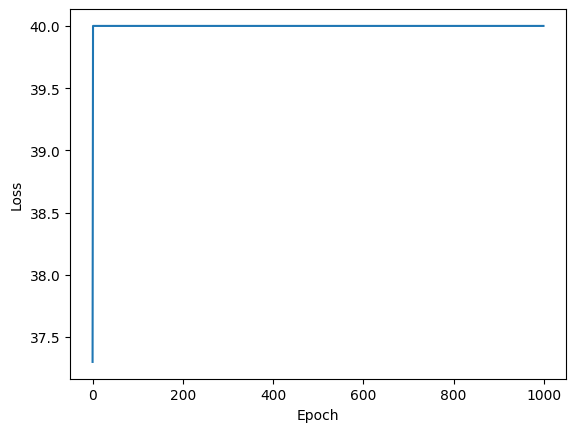

In [24]:
import matplotlib.pyplot as plt
plt.plot(loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [25]:
# Generate predictions
preds = model(inputs)
preds

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]], grad_fn=<SigmoidBackward0>)

In [26]:
preds.int()

tensor([[1],
        [1],
        [1],
        [1],
        [1]], dtype=torch.int32)